# 셀프 주유소는 정말 저렴할까?

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### 1. 서울시 구별 주유소 가격 정보 얻기

In [3]:
url = 'https://www.opinet.co.kr/user/main/mainView.do'
driver = webdriver.Chrome()
driver.get(url)

In [4]:
# 싼주유소 찾기
driver.find_element_by_css_selector('.ic_m1').click()

In [6]:
# 서울 자치구 리스트 가져오기
metro = driver.find_element_by_xpath('//*[@id="SIDO_NM0"]')     # 광역시도
metro.send_keys('서울')
time.sleep(1)

In [12]:
sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')     # 시군구
gu_list = sigungu.find_elements_by_css_selector('option')
gu_names = [gu.text for gu in gu_list]
del gu_names[0]                         # 시/군/구

In [ ]:
# 엑셀 저장
driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()

In [14]:
# 25개 자치구에 대해서 주유소 정보 엑셀 저장
for gu in gu_names:
    sigungu = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
    sigungu.send_keys(gu)
    time.sleep(2)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]/span').click()
    time.sleep(2)

In [15]:
driver.close()

### 2. 구별 휘발유 가격에 대한 데이터 정리

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import pandas as pd
from glob import glob

In [18]:
# glob의 역활
glob('C:/Users/lunaw/Downloads/지역*.xls')

['C:/Users/lunaw/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (3).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(주유소) (4).xls',
 'C:/Users/lunaw/Downloads\\지역_위치별(

In [19]:
file = glob('C:/Users/lunaw/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1969,1899,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1983,1927,-
2,서울특별시,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),GS칼텍스,02-475-2600,N,2145,1995,1920,1460
3,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,2015,1950,-
4,서울특별시,대성석유(주)길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,2214,2025,1969,1650


In [20]:
# 25개 파일을 읽어서 하나의 데이터 프레임으로 만들기
df_list = []
for file in glob('C:/Users/lunaw/Downloads/지역*.xls'):
    gs = pd.read_excel(file, header=2)
    df_list.append(gs)

df = pd.concat(df_list)
df.shape

(464, 10)

In [21]:
df = df[['상호', '주소', '휘발유', '셀프여부', '상표']]
df.head()

,상호,주소,휘발유,셀프여부,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1983,N,현대오일뱅크
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1995,N,GS칼텍스
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2015,Y,GS칼텍스
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2025,N,GS칼텍스


In [22]:
df.rename(columns={'휘발유':'가격', '셀프여부':'셀프'}, inplace=True)
df.tail()

,상호,주소,가격,셀프,상표
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2455,N,GS칼텍스
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스
33,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지
34,경원주유소,서울 강남구 도산대로 428 (청담동),-,N,S-OIL
35,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지


In [23]:
df['구'] = df.주소.str.split().str[1]
df.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1983,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1995,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2015,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2025,N,GS칼텍스,강동구


In [24]:
df.구.unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 35
Data columns (total 6 columns):
상호    464 non-null object
주소    464 non-null object
가격    464 non-null object
셀프    464 non-null object
상표    464 non-null object
구     464 non-null object
dtypes: object(6)
memory usage: 25.4+ KB


In [26]:
# 가격이 '-'는 삭제하고, 정수로 변환
df = df[df.가격 != '-']
df.가격 = df.가격.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 0 to 32
Data columns (total 6 columns):
상호    456 non-null object
주소    456 non-null object
가격    456 non-null int32
셀프    456 non-null object
상표    456 non-null object
구     456 non-null object
dtypes: int32(1), object(5)
memory usage: 23.2+ KB


In [183]:
df.to_csv('서울-주유소(220418).csv', index=False)

### 3. 셀프 주유소가 정말 저렴한지 확인

In [28]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [47]:
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams.update({'text.color': "gray",
                    'axes.labelcolor': "white",
                    'xtick.color': "white",
                    'ytick.color': "white"
                    })

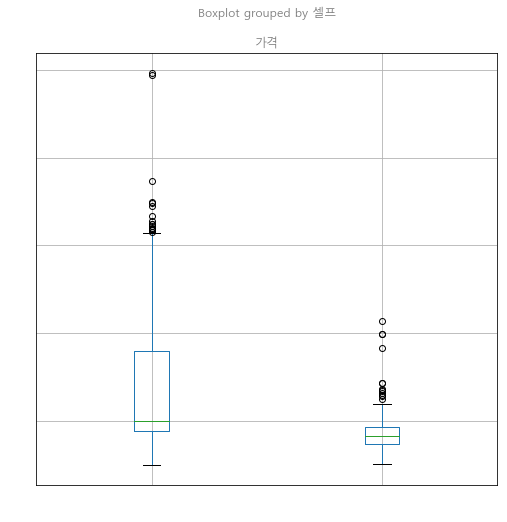

In [48]:
df.boxplot(column='가격', by='셀프', figsize=(8,8))
plt.show()

In [49]:
df[df.셀프 == 'Y'].가격.mean(), df[df.셀프 == 'N'].가격.mean()

(1973.4, 2090.8552036199094)

In [50]:
df[df.셀프 == 'Y'].shape, df[df.셀프 == 'N'].shape

((235, 6), (221, 6))

- 사이파이를 이용한 가설검정
    - 2-sample T 검정(독립표본 T 검정)

In [51]:
import scipy as sp
sp.stats.ttest_ind(df[df.셀프 == 'Y'].가격, df[df.셀프 == 'N'].가격, equal_var = False)

Ttest_indResult(statistic=-9.692657420833939, pvalue=5.098148364056279e-19)

- p-value가 0.05보다 작으므로 귀무가설 기각, 즉 대립가설 채택
    - H0(귀무가설): 셀프주유소와 일반주유소의 가격 차이가 없다.
    - H1(대립가설): 셀프주유소의 가격이 일반주유소보다 저렴하다.

- 상표별로 가격 확인

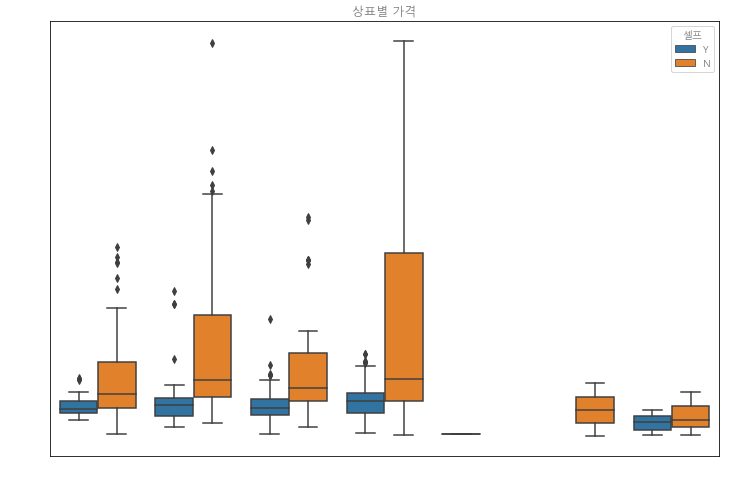

In [52]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=df)
plt.title('상표별 가격')
plt.show()

### 4. 구별 휘발유 가격 비교

In [54]:
import json, folium

In [55]:
# 가격이 착한 주유소 Top 5
df.sort_values(by='가격').head()

,상호,주소,가격,셀프,상표,구
0,정호주유소,서울 성동구 고산자로 307 (마장동),1898,N,자가상표,성동구
1,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1902,N,알뜰주유소,강서구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1902,N,SK에너지,양천구
0,화곡역주유소,서울 강서구 강서로 154 (화곡동),1902,Y,알뜰주유소,강서구
2,형산석유(주)원주유소,서울 양천구 남부순환로 408,1904,N,현대오일뱅크,양천구


In [56]:
# 가격이 비싼 주유소 Top 5
df.sort_values(by='가격', ascending=False).head()

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2794,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2789,N,GS칼텍스,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2548,N,GS칼텍스,강남구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2499,N,GS칼텍스,중구
31,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2497,N,SK에너지,서초구


In [59]:
# 구별 비교
df.groupby('구')['가격'].agg(['mean', 'min', 'max']).sort_values(by='mean', ascending=False)

,mean,min,max
구,,,
용산구,2384.076923,2232,2789
중구,2288.100000,1959,2794
종로구,2243.500000,2049,2438
강남구,2131.848485,1977,2548
강동구,2072.928571,1969,2298
성동구,2070.470588,1898,2328
서초구,2047.968750,1904,2497
영등포구,2035.461538,1946,2428
구로구,2030.571429,1919,2448


- 구별 비교한 것을 단계구분도로 표시

In [62]:
gu_data = df.groupby('구')[['가격']].mean()
gu_data.head(3)

,가격
구,
강남구,2131.848485
강동구,2072.928571
강북구,1960.461538


In [63]:
filename = '../04.지도시각화/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(filename, encoding='utf-8'))

In [78]:
import numpy as np

def get_text_location(geo_str):
    gu_dict = {}
    for gu in geo_str['features']:
        for coord in gu['geometry']['coordinates']:
            geo = np.array(coord)
            gu_dict[gu['id']] = [np.mean(geo[:,1]), np.mean(geo[:,0])]
    return gu_dict

In [79]:
from folium.features import DivIcon

gu_dict = get_text_location(geo_str)

In [80]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data=geo_str,
    data=gu_data.가격,
    columns=[gu_data.index, gu_data.가격],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)
for gu_name in gu_data.index:
    folium.Marker(
        location=gu_dict[gu_name],
        icon=DivIcon(icon_size=(80,20), icon_anchor=(20,0),
            html=f'<div style="font-size: 10pt">{gu_name}</div>'
        )
    ).add_to(map)
title_html = '<h3 align="center" style="font-size:20px">구별 휘발유 가격</h3>'    
map.get_root().html.add_child(folium.Element(title_html)) 
map

- 각 구별 가장 싼 주유소와 비싼 주유소

In [159]:
df

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1983,N,현대오일뱅크,강동구
2,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1995,N,GS칼텍스,강동구
3,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),2015,Y,GS칼텍스,강동구
4,대성석유(주)길동주유소,서울 강동구 천호대로 1168,2025,N,GS칼텍스,강동구
...,...,...,...,...,...,...
28,대청주유소,서울 강남구 개포로 654 (일원동),2336,N,SK에너지,강남구
29,갤러리아주유소,서울 강남구 압구정로 426,2440,N,SK에너지,강남구
30,SK논현주유소,서울 강남구 논현로 747 (논현동),2445,N,SK에너지,강남구
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2455,N,GS칼텍스,강남구


- 각 구별 비싼 주유소

In [160]:
idx = df.groupby('구')['가격'].transform(max) == df['가격']
exp = df[idx]
exp.head()

,상호,주소,가격,셀프,상표,구
13,광성주유소,서울 강동구 올림픽로 673 (천호동),2298,N,S-OIL,강동구
18,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),2190,N,현대오일뱅크,동대문구
9,살피재주유소,서울 동작구 상도로 334,2135,N,SK에너지,동작구
11,마포주유소,서울 마포구 마포대로 186 (공덕동),2298,N,S-OIL,마포구
14,문화사랑주유소,서울 서대문구 세검정로 87 (홍제동),2059,N,S-OIL,서대문구


- 각 구별 싼 주유소

In [161]:
idx = df.groupby('구')['가격'].transform(min) == df['가격']
cheap = df[idx]
cheap.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크,강동구
0,대성산업(주)동마장주유소,서울 동대문구 고산자로 405 (용두동),1935,Y,GS칼텍스,동대문구
1,대성산업㈜청량리주유소,서울 동대문구 왕산로 289 (청량리동),1935,Y,GS칼텍스,동대문구
2,동서울고속주유소,서울 동대문구 한천로 414,1935,Y,SK에너지,동대문구
3,풍한주유소,서울 동대문구 안암로 168,1935,N,SK에너지,동대문구


- 각 주유소 주소의 위도 경도 구하기

In [162]:
import requests
from urllib.parse import quote

In [163]:
with open('../04.지도시각화/kakaoapikey.txt') as file:
    kakao_key = file.read()

In [164]:
local_url = 'https://dapi.kakao.com/v2/local/search/address.json'
addr = '서울 강남구 남부순환로 2718 (도곡2동)'
url = f'{local_url}?query={quote(addr)}'

In [165]:
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [166]:
result = requests.get(url, headers=header).json()

In [167]:
lng = float(result['documents'][0]['x'])
lat = float(result['documents'][0]['y'])
print(lng, lat)

127.043319375098 37.4854150814069


    - 각 구별 비싼 주유소 위도, 경도

In [180]:
lng_list, lat_list = [], []
for i in exp.주소:
    url = f'{local_url}?query={quote(i)}'
    header = {'Authorization': f'KakaoAK {kakao_key}'}
    result = requests.get(url, headers=header).json()
    lng_list.append(float(result['documents'][0]['x']))
    lat_list.append(float(result['documents'][0]['y']))
exp['위도'] = lat_list
exp['경도'] = lng_list
exp.reset_index(inplace=True)
exp.head()

,level_0,index,상호,주소,가격,셀프,상표,구,위도,경도
0,0,13,광성주유소,서울 강동구 올림픽로 673 (천호동),2298,N,S-OIL,강동구,37.541577,127.124242
1,1,18,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),2190,N,현대오일뱅크,동대문구,37.588425,127.057395
2,2,9,살피재주유소,서울 동작구 상도로 334,2135,N,SK에너지,동작구,37.498360,126.951389
3,3,11,마포주유소,서울 마포구 마포대로 186 (공덕동),2298,N,S-OIL,마포구,37.550595,126.955637
4,4,14,문화사랑주유소,서울 서대문구 세검정로 87 (홍제동),2059,N,S-OIL,서대문구,37.595442,126.948477


    - 각 구별 싼 주유소 위도, 경도

In [181]:
lng_list, lat_list = [], []
for i in cheap.주소:
    url = f'{local_url}?query={quote(i)}'
    header = {'Authorization': f'KakaoAK {kakao_key}'}
    result = requests.get(url, headers=header).json()
    lng_list.append(float(result['documents'][0]['x']))
    lat_list.append(float(result['documents'][0]['y']))
cheap['위도'] = lat_list
cheap['경도'] = lng_list
cheap.reset_index(inplace=True)
cheap.head()

,index,상호,주소,가격,셀프,상표,구,위도,경도
0,0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1969,Y,현대오일뱅크,강동구,37.536417,127.149372
1,0,대성산업(주)동마장주유소,서울 동대문구 고산자로 405 (용두동),1935,Y,GS칼텍스,동대문구,37.575865,127.037719
2,1,대성산업㈜청량리주유소,서울 동대문구 왕산로 289 (청량리동),1935,Y,GS칼텍스,동대문구,37.586470,127.051603
3,2,동서울고속주유소,서울 동대문구 한천로 414,1935,Y,SK에너지,동대문구,37.597544,127.068039
4,3,풍한주유소,서울 동대문구 안암로 168,1935,N,SK에너지,동대문구,37.589211,127.035993


- 각 주유소 지도위에 표시하기

In [182]:
map = folium.Map(
    location=[exp.위도.mean(), exp.경도.mean()], zoom_start=12
)
for i in exp.index:
    folium.Marker(
        location=[exp.위도[i], exp.경도[i]],
        popup = folium.Popup(exp.주소[i], max_width=200),
        tooltip=exp.상호[i],
        icon=folium.Icon(color='red')
    ).add_to(map)

for i in cheap.index:
    folium.Marker(
        location=[cheap.위도[i], cheap.경도[i]],
        popup = folium.Popup(cheap.주소[i], max_width=200),
        tooltip=cheap.상호[i],
        icon=folium.Icon(color='green')
    ).add_to(map)

title_html = '<h3 align="center" style="font-size:20px">각 구별 가격이 싼/비싼 주유소</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map